In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def compare_resource_usage(query, run, fname):
    memory_q1_opt = pd.read_csv(f'{query}/opt/resource-usage-{run}.csv')
    memory_q1_ref = pd.read_csv(f'{query}/ref/resource-usage-{run}.csv')
    
    plt.plot(memory_q1_ref['memory_used'] / (1000 * 1000 * 1000))
    plt.plot(memory_q1_opt['memory_used'] / (1000 * 1000 * 1000))
    plt.savefig(f'memory-{fname}.eps')
    plt.show()

    plt.plot(memory_q1_ref['cpu_used'])
    plt.plot(memory_q1_opt['cpu_used'])
    plt.show()

    N = 15
    plt.plot(np.convolve(memory_q1_ref['cpu_used'], np.ones(N)/N, mode='valid'))
    plt.plot(np.convolve(memory_q1_opt['cpu_used'], np.ones(N)/N, mode='valid'))
    plt.savefig(f'cpu15s-{fname}.eps')
    plt.show()

In [3]:
compare_resource_usage('benchmark-results-lsqb/q1.sql', '05', 'q1-sf100')

#compare_resource_usage('benchmark-results-lsqb-sf100/q4.sql')

FileNotFoundError: [Errno 2] No such file or directory: 'benchmark-results-lsqb/q1.sql/opt/resource-usage-05.csv'

In [148]:
stats_opt_df = pd.read_csv('benchmark-results-stats/results-opt.csv')
df_opt = stats_opt_df[stats_opt_df['run'] != 1]
df_opt = df_opt.groupby(['query']).agg({'runtime': ['mean', 'std', 'sum']})
df_opt.to_csv('benchmark-results-stats/results-opt-mean.csv')

stats_ref_df = pd.read_csv('benchmark-results-stats/results-ref.csv')
df_ref = stats_ref_df[stats_opt_df['run'] != 1]
df_ref = df_ref.groupby(['query']).agg({'runtime': ['mean', 'std', 'sum']})
df_ref.to_csv('benchmark-results-stats/results-ref-mean.csv')

/tmp/ipykernel_119070/2389489031.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ref = stats_ref_df[stats_opt_df['run'] != 1]


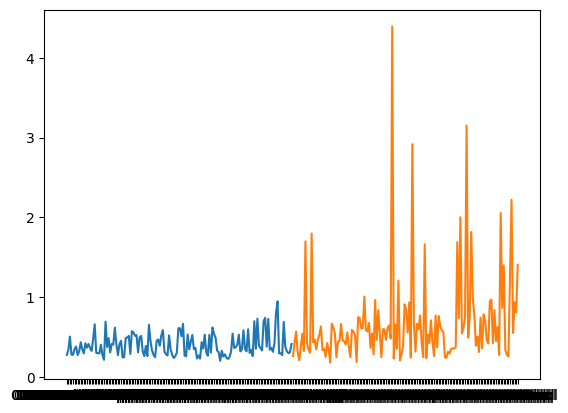

In [149]:
#df[['query', 'runtime']].plot()
df = df_opt
plt.plot(df[df.index.str.contains('hint.sql')][[('runtime', 'mean')]])
plt.plot(df[~df.index.str.contains('hint.sql')][[('runtime', 'mean')]])
#df.index#['query']

In [150]:
df_opt[df_opt.index.str.contains('hint.sql')][[('runtime', 'sum')]].sum()

runtime  sum    294.548484
dtype: float64

In [151]:
df_opt[~df_opt.index.str.contains('hint.sql')][[('runtime', 'sum')]].sum()

runtime  sum    489.289311
dtype: float64

In [127]:
df_ref[[('runtime', 'sum')]].sum()

runtime  sum    7790.720676
dtype: float64

In [132]:
df = pd.read_csv('benchmark-results-tpch/results-ref.csv')

In [134]:
print(df)

   Unnamed: 0              query     runtime  peak_memory mode  run
0           0              2.sql   90.437012    97.611260  ref    1
1           1             11.sql  184.526688    83.908276  ref    1
2           2        11-hint.sql  165.184132    81.928032  ref    1
3           3       median-1.sql   88.962739    84.448080  ref    1
4           4  median-1-hint.sql   86.977602    78.727426  ref    1
5           5              2.sql   94.194016    86.396092  ref    2
6           6             11.sql  190.415481    89.462231  ref    2
